**Ejercicio número 1**

**Análisis exploratorio de datos**

**Autor** Luis Eduardo Sánchez Pérez

Se agregan los paquetes para trabajar con JULIA

In [100]:
#using Pkg
#Pkg.add("DataFrames")
#Pkg.add("CSV")
#Pkg.add("StatsPlots")
#Pkg.add("Statistics")

Se importan los paquetes para trabajar en este programa

In [101]:
using DataFrames
using CSV
using StatsPlots
using Statistics

Se crea la función dataShape

In [102]:
function dataShape(data)
    return size(data)
end

#se lee el archivo completo CSV
data = CSV.read("../dat/bottle.csv", DataFrame)
#Se usa la función
shape = dataShape(data)
println("Forma del conjunto de datos: ", shape)

Forma del conjunto de datos: (864863, 74)


En este caso, podemos ver que se trata de un conjunto de datos de 74 columnas con 864863 filas

Se crea la función dataType, la cual servirá para que se puedan observar los tipos de datos que contiene el origen de datos

In [103]:
function dataType(data)
    for col in names(data)
        println("$col: $(eltype(data[!, col]))")
    end
end

#Aquí podemos ver los tipos de dato de cada columna
dataType(data)

Cst_Cnt: Int64
Btl_Cnt: Int64
Sta_ID: String15
Depth_ID: String
Depthm: Int64
T_degC: Union{Missing, Float64}
Salnty: Union{Missing, Float64}
O2ml_L: Union{Missing, Float64}
STheta: Union{Missing, Float64}
O2Sat: Union{Missing, Float64}
Oxy_µmol/Kg: Union{Missing, Float64}
BtlNum: Union{Missing, Int64}
RecInd: Int64
T_prec: Union{Missing, Int64}
T_qual: Union{Missing, Int64}
S_prec: Union{Missing, Int64}
S_qual: Union{Missing, Int64}
P_qual: Union{Missing, Int64}
O_qual: Union{Missing, Int64}
SThtaq: Union{Missing, Int64}
O2Satq: Union{Missing, Int64}
ChlorA: Union{Missing, Float64}
Chlqua: Union{Missing, Int64}
Phaeop: Union{Missing, Float64}
Phaqua: Union{Missing, Int64}
PO4uM: Union{Missing, Float64}
PO4q: Union{Missing, Int64}
SiO3uM: Union{Missing, Float64}
SiO3qu: Union{Missing, Int64}
NO2uM: Union{Missing, Float64}
NO2q: Union{Missing, Int64}
NO3uM: Union{Missing, Float64}
NO3q: Union{Missing, Int64}
NH3uM: Union{Missing, Float64}
NH3q: Union{Missing, Int64}
C14As1: Union{Missin

Se puede observar que la mayoría de las columnas tienen datos numéricos y en todos los casos hay valores nulos. También se ve que hay cadenas de texto en los datos

Ahora se crea la función count_missing, que indica cuántos valores faltantes hay por columna

In [104]:
function count_missing(col)
    return sum(ismissing.(col))
end

#De esta forma se imprimen los datos con valores faltantes
for col in names(data)
    missing_count = count_missing(data[!, col])
    println("Columna '$col': $missing_count valores faltantes")
end


Columna 'Cst_Cnt': 0 valores faltantes
Columna 'Btl_Cnt': 0 valores faltantes
Columna 'Sta_ID': 0 valores faltantes
Columna 'Depth_ID': 0 valores faltantes
Columna 'Depthm': 0 valores faltantes
Columna 'T_degC': 10963 valores faltantes
Columna 'Salnty': 47354 valores faltantes
Columna 'O2ml_L': 168662 valores faltantes
Columna 'STheta': 52689 valores faltantes
Columna 'O2Sat': 203589 valores faltantes
Columna 'Oxy_µmol/Kg': 203595 valores faltantes
Columna 'BtlNum': 746196 valores faltantes
Columna 'RecInd': 0 valores faltantes
Columna 'T_prec': 10963 valores faltantes
Columna 'T_qual': 841736 valores faltantes
Columna 'S_prec': 47354 valores faltantes
Columna 'S_qual': 789949 valores faltantes
Columna 'P_qual': 191108 valores faltantes
Columna 'O_qual': 680187 valores faltantes
Columna 'SThtaq': 799040 valores faltantes
Columna 'O2Satq': 647066 valores faltantes
Columna 'ChlorA': 639591 valores faltantes
Columna 'Chlqua': 225697 valores faltantes
Columna 'Phaeop': 639592 valores falta

Se puede observar que hay columnas que tienen muchos datos faltantes. Para el total de 864863 valores en el origen, hay algunas que casi carecen del 99% de los datos

Para ello se crea la función dataMissingPercentage, en la cual se puede ver el porcentaje de datos que no tienen información

In [105]:
function dataMissingPercentage(data)
    for col in names(data)
        porcFaltante = (count_missing(data[!, col]) / nrow(data)) * 100
        println("$col: $porcFaltante%")
    end
end

#Aquí se imprimen los datos con porcentaje faltante
dataMissingPercentage(data)

Cst_Cnt: 0.0%
Btl_Cnt: 0.0%
Sta_ID: 0.0%
Depth_ID: 0.0%
Depthm: 0.0%
T_degC: 1.2675996082616552%
Salnty: 5.475318056154559%
O2ml_L: 19.501585800294382%
STheta: 6.092178761260454%
O2Sat: 23.54002888318728%
Oxy_µmol/Kg: 23.54072263468318%
BtlNum: 86.27909853930622%
RecInd: 0.0%
T_prec: 1.2675996082616552%
T_qual: 97.32593485904704%
S_prec: 5.475318056154559%
S_qual: 91.33805007267047%
P_qual: 22.096910146462502%
O_qual: 78.64679145714408%
SThtaq: 92.3891992142108%
O2Satq: 74.81716757451758%
ChlorA: 73.95286883587343%
Chlqua: 26.096271895086275%
Phaeop: 73.95298446112274%
Phaqua: 26.095809394089002%
PO4uM: 52.210118828068715%
PO4q: 47.76213111209521%
SiO3uM: 59.058139844114045%
SiO3qu: 40.930991382450166%
NO2uM: 60.967690836583365%
NO2q: 38.77943674316048%
NO3uM: 60.987694004715195%
NO3q: 38.726364753724%
NH3uM: 92.4887525538727%
NH3q: 6.540226602363611%
C14As1: 98.33129640185787%
C14A1p: 98.5246218187158%
C14A1q: 1.879835303394873%
C14As2: 98.33337765634556%
C14A2p: 98.5267030732035%
C14

Se puede confirmar que hay muchos valores con más del 99% de datos faltantes

Se crea ahora la función deleteColumns, la cual devolverá un subconjunto del dataSet original, en el cual se eliminarán las columnas que no cumplan con el umbral establecido

In [106]:
function deleteColumns(data, umbral)
    colBorrar = []
    for col in names(data)
        porcFaltante = (count_missing(data[!, col]) / nrow(data)) * 100
        if porcFaltante > umbral
            push!(colBorrar, col)
        end
    end
    select!(data, Not(colBorrar))
    return data
end

# Se eliminan las columnas con 50% o más datos faltantes
data2 = deleteColumns(data, 50)

864863×36 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 864857 │   34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…     ⋯
 864858 │   34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864859 │   34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864860 │   34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864861 │   34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
 864862 │   34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864863 │   34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
                                              32 columns and 864848 rows omitted

Una vez realizada la operación, se redujo el número de columnas de **74 a 36** 

Ahora se crea la función calculareCorrelation, la cual crea la matriz de correlación de los datos:

In [107]:
function calculateCorrelation(data)
    
    # Del conjunto de datos, se seleccionan solo las columnas numéricas
    datosNumericos = select(data, names(data, col -> eltype(data[!, col]) <: Union{Missing, Number}))
    
    # Para poder trabajar con los datos, los valores missing se cambian por cero (porque se requieren hacer operaciones con ellos).
    datosNumericosLimpios = mapcols(x -> coalesce.(x, 0), datosNumericos)

    # Convierte el DataFrame generado a una matriz Float32 (No Float64 porque da un error de memoria)
    miMatriz = convert(Array{Float32}, Matrix(datosNumericosLimpios))

    # Calcula la matriz de correlación usando Statistics
    return cor(miMatriz)
end

# Con los datos reducidos (Data2), se crea la matriz de correlación
matCorrelacion = calculateCorrelation(data2)

34×34 Matrix{Float32}:
  1.0        0.999345   -0.162223   …   0.191619    0.224419   -0.161961
  0.999345   1.0        -0.161617       0.191053    0.223831   -0.161348
 -0.162223  -0.161617    1.0           -0.440919   -0.440449    0.999996
  0.100735   0.101639   -0.639525       0.580628    0.625448   -0.638287
  0.222286   0.22134    -0.0399071      0.0553981   0.194554   -0.0402077
  0.191604   0.191037   -0.440919   …   0.999998    0.959309   -0.439661
  0.207768   0.206725    0.0457081     -0.0175561   0.113498    0.0452192
  0.228822   0.227981   -0.434973       0.949178    0.985157   -0.433814
  0.239783   0.238842   -0.421239       0.951566    0.979917   -0.42008
 -0.100142  -0.100828    0.0823158     -0.080461   -0.0792344   0.0821835
  ⋮                                 ⋱                          
  0.100742   0.101647   -0.639525   …   0.580629    0.625449   -0.638288
  0.187184   0.187816   -0.590847       0.541414    0.660366   -0.589807
  0.222287   0.22134    -0.0399091 

Una vez creada la matriz de correlación, podemos desplegarla mediante un mapa de calor, para ello sirve la función displayCorrelation

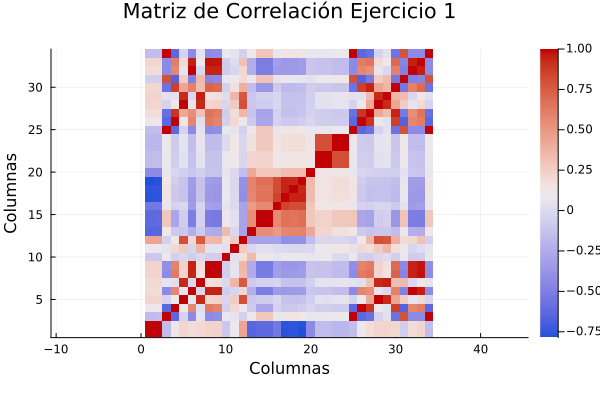

In [114]:
using Plots

function displayCorrelation(matCorrelacion)
    heatmap(matCorrelacion, #Matriz de correlación
            aspect_ratio = 1, #Para que se vean cuadradas
            c = :diverging, #Se define la paleta de colores para el mapa de calor
            xlabel = "Columnas", 
            ylabel = "Columnas", 
            title = "Matriz de Correlación Ejercicio 1",
            annot = true)
end

displayCorrelation(matCorrelacion)

Podemos observar en el mapa de calor que efectivamente se establece una relación absoluta entre los datos en la diagonal, lo cual tiene sentido, porque son "los mismos". Adicional se pueden ver relaciones entre las variables en el rango (1, 10) con las del rango (25,30)

Es hora de remover los valores que pueden dar "picos" en las estimaciones, para eso se crea la función removeOutliersIQR. La estrategia consiste en que, considerando los datos ordenados, se quiten los que representan el 25% de inferiores y el 25% de superiores. Y con ello generar un nuevo dataSet

In [109]:
function removeOutliersIQR(data)
    for col in names(data)
        if eltype(data[!, col]) <: Union{Missing, Number} #Se consideran las columnas que son numéricas, ya que hay columnas String
            q1 = quantile(skipmissing(data[!, col]), 0.25) #Cuartil que separa el 25% de los datos inferiores
            q3 = quantile(skipmissing(data[!, col]), 0.75) #Cuartil que separa el 25% de los datos superiores (por eso se usa 0.75)
            iqr = q3 - q1 #Se calcula la dispersión de los datos
            limInf = q1 - 1.5 * iqr #Se calcula el límite inferior
            limSup = q3 + 1.5 * iqr #Se calcula el límte superior
            filter!(row -> !ismissing(row[col]) && limInf <= row[col] <= limSup, data) #Se genera el nuevo dataSet con los datos límites considerados
        end
    end
    return data
end

# Se remueven los outliners
data3 = removeOutliersIQR(data2)

131850×36 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │      71     2163  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…     ⋯
      2 │      71     2165  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      3 │      71     2166  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      4 │      71     2169  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      5 │      71     2171  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…     ⋯
      6 │      71     2173  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      7 │      71     2174  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      8 │      71     2176  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 131844 │   32581   817800  070.0 060.0  20-1101NM-MX-031-1116-07000600-0…     ⋯
 131845 │   32582   817822  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131846 │   32582   817824  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131847 │   32582   817826  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131848 │   32582   817829  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     ⋯
 131849 │   32582   817831  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131850 │   33073   830773  093.3 028.0  20-1207OS-MX-185-1506-09330280-0…
                                              32 columns and 131835 rows omitted

Se puede observar que con ello, se redujeron el número de filas de **864863 a 131850**, lo cual ya limpió los datos y se puede trabajar posteriormente con ellos.

Se crean las funciones faltantes para filtrar las columnas de la correlación.

Se crea la función deleteRow, la cual quita los nulls en el dataset dada una columna

In [119]:
function deleteRow(data, col)
    #Simplemente devuelve el dataset
    return dropmissing(data, col)
end
data4 = deleteRow(data3, :Salnty) 

131850×36 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │      71     2163  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…     ⋯
      2 │      71     2165  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      3 │      71     2166  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      4 │      71     2169  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      5 │      71     2171  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…     ⋯
      6 │      71     2173  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      7 │      71     2174  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      8 │      71     2176  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 131844 │   32581   817800  070.0 060.0  20-1101NM-MX-031-1116-07000600-0…     ⋯
 131845 │   32582   817822  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131846 │   32582   817824  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131847 │   32582   817826  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131848 │   32582   817829  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     ⋯
 131849 │   32582   817831  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131850 │   33073   830773  093.3 028.0  20-1207OS-MX-185-1506-09330280-0…
                                              32 columns and 131835 rows omitted

Ahora se crea la función que, del dataset indicado, elimina las columnas con una correlación mayor/menor a la indicada en umbral

In [124]:
function filterColumnsByCorrelation(data, colObjetivo, umbral, relacion)
    matCorrelacion = calculateCorrelation(data) #Se calcula la matriz de correlación primero
    colsEliminar = [] #Se van juntando las columnas que se van a eliminar
    for col in names(data)
        if col != colObjetivo #Se evalúan las columnas que no son la indicada en la función
            indiceObjetivo = findfirst(==(colObjetivo), names(data)) #Busca el índice de la columna que se va a comparar
            indiceCol = findfirst(==(col), names(data)) #Busca el índice de la columna en la iteración
            if !isnothing(indiceObjetivo) && !isnothing(indiceCol) #Esta condición se coloca por si alguno de los índices es nulo
                correlacion = matCorrelacion[indiceObjetivo, indiceCol] #Obtiene la matriz de correlación de ambas columnas
                if relacion == 1 #Se evalúa si se sobrepasa el umbral
                    if correlacion > umbral
                        push!(colsEliminar, col)
                    end
                else #Se evalúa si NO se sobrepasa el umbral
                    if correlacion < umbral
                        push!(colsEliminar, col)
                    end
                end

            end
        end
    end
    #Se seleccionan las columnas quitando las consideradas para eliminarse
    select!(data, Not(colsEliminar))
    return data
end

data5=filterColumnsByCorrelation(data4, :T_degC, 0.9, 1)


131850×36 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │      71     2163  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…     ⋯
      2 │      71     2165  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      3 │      71     2166  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      4 │      71     2169  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      5 │      71     2171  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…     ⋯
      6 │      71     2173  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      7 │      71     2174  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
      8 │      71     2176  044.0 048.5  19-4904CR-HY-087-0606-04400485-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 131844 │   32581   817800  070.0 060.0  20-1101NM-MX-031-1116-07000600-0…     ⋯
 131845 │   32582   817822  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131846 │   32582   817824  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131847 │   32582   817826  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131848 │   32582   817829  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     ⋯
 131849 │   32582   817831  070.0 070.0  20-1101NM-MX-031-0427-07000700-0…
 131850 │   33073   830773  093.3 028.0  20-1207OS-MX-185-1506-09330280-0…
                                              32 columns and 131835 rows omitted

Finalmente, con la función describe se pueden ver cuáles son las mejores columnas para hacer la regresión lineal

In [122]:
describe(data5)

36×7 DataFrame
 Row │ variable     mean      min                                median    max ⋯
     │ Symbol       Union…    Any                                Union…    Any ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt      10896.3   71                                 11956.0   330 ⋯
   2 │ Btl_Cnt      286780.0  2163                               314129.0  830
   3 │ Sta_ID                 002.0 065.7                                  176
   4 │ Depth_ID               19-4904CR-HY-087-0606-04400485-0…            20-
   5 │ Depthm       195.041   0                                  150.0     657 ⋯
   6 │ T_degC       10.6979   3.98                               9.84      21.
   7 │ Salnty       33.9123   32.639                             33.962    35.
   8 │ O2ml_L       3.09983   0.0                                2.94      9.4
  ⋮  │      ⋮          ⋮                      ⋮                     ⋮          ⋱
  30 │ R_SALINITY   33.9123   32.639                             33.962    35. ⋯
  31 │ R_SIGMA      25.9144   23.11                              26.16     27.
  32 │ R_SVA        211.072   86.0                               187.2     475
  33 │ R_DYNHT      0.43024   0.0                                0.39      1.2
  34 │ R_O2         3.09983   0.0                                2.94      9.4 ⋯
  35 │ R_O2Sat      51.4264   0.0                                45.55     157
  36 │ R_PRES       196.134   0                                  151.0     661
                                                   3 columns and 21 rows omitted